In [1]:
import matplotlib.pyplot as plt
import csv
import numpy as np
from tqdm import tqdm

In [2]:
with open("results.csv") as f:
    reader = csv.reader(f)
    data1 = list(reader)

with open("data_list.csv") as f:
    reader = csv.reader(f)
    data2 = list(reader)
data2 = data2[1:]

In [3]:
mismatch_indices = []
error_indices = []
read_indices = []

In [4]:
for i in tqdm(range(3066720)):
    r1 = data1[i]
    r2 = data2[i]
    if r2[0] == 'Nil':
        continue

    pos = int(r1[1])
    if pos < 0:
        pos += 151100561
    l = int(r1[2])
    for i in range(pos, pos + l):
        if i < 151100561:
            read_indices.append(i)

    meth = r2[2]
    string = r2[3]
    if string == '':
        continue
    string = string.split(';')
    string = [int(i.strip()) for i in string]   
    if meth == 'mismatch':
        for i in string:
            if i+pos < 151100561:
                mismatch_indices.append(i+pos)
                error_indices.append(i+pos)
    else:
        for i in string:
            if i+pos < 151100561:
                error_indices.append(i+pos)

  0%|          | 0/3066720 [00:00<?, ?it/s]

100%|██████████| 3066720/3066720 [00:12<00:00, 240817.39it/s]


In [5]:
mismatch_indices = list(set(mismatch_indices))
error_indices = list(set(error_indices))
read_indices = list(set(read_indices))

In [6]:
len(mismatch_indices), len(error_indices), len(read_indices)

(582720, 595762, 16660842)

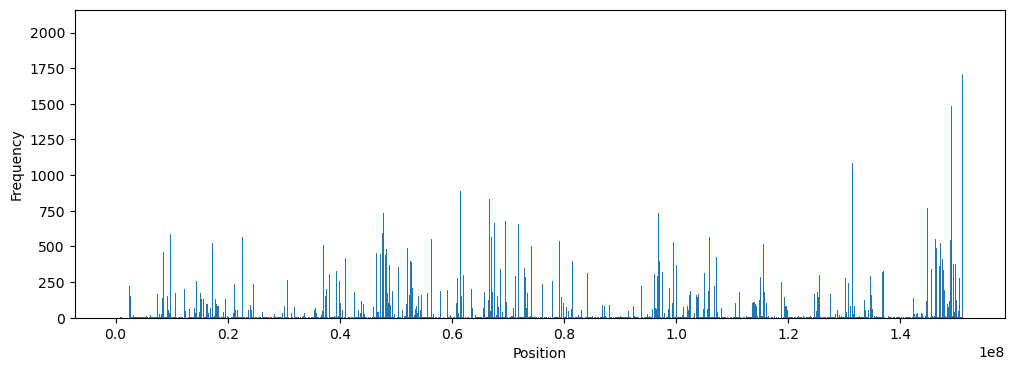

In [7]:
plt.hist(mismatch_indices, bins=10000, label='mismatch')
fig = plt.gcf()
fig.set_size_inches(12, 4)
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.show()

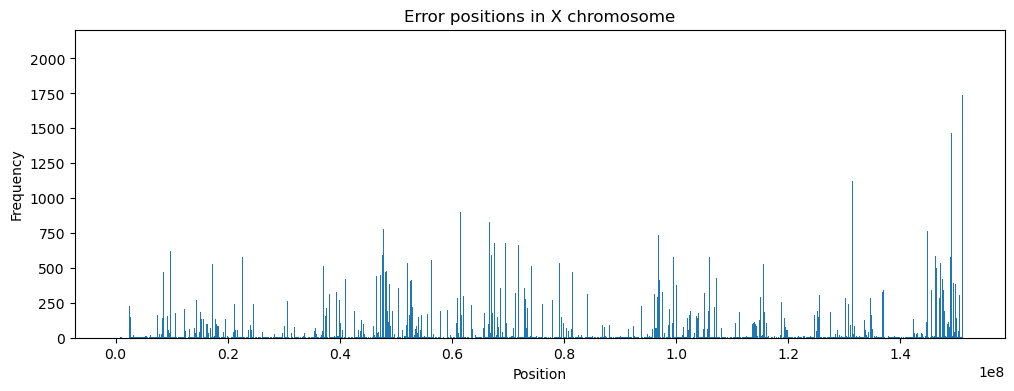

In [13]:
plt.hist(error_indices, bins=10000, label='error')
fig = plt.gcf()
fig.set_size_inches(12, 4)
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.title('Error positions in X chromosome')
plt.show()

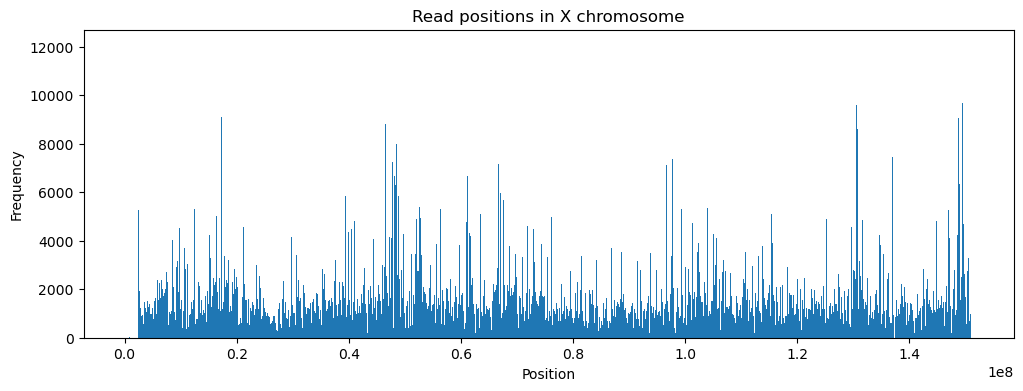

In [14]:
plt.hist(read_indices, bins=10000, label='read')
fig = plt.gcf()
fig.set_size_inches(12, 4)
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.title('Read positions in X chromosome')
plt.show()

/tmp/ipykernel_10873/1378547228.py:5: RuntimeWarning: divide by zero encountered in divide
  plt.plot(hist_error_indices/hist_read_indices)
/tmp/ipykernel_10873/1378547228.py:5: RuntimeWarning: invalid value encountered in divide
  plt.plot(hist_error_indices/hist_read_indices)


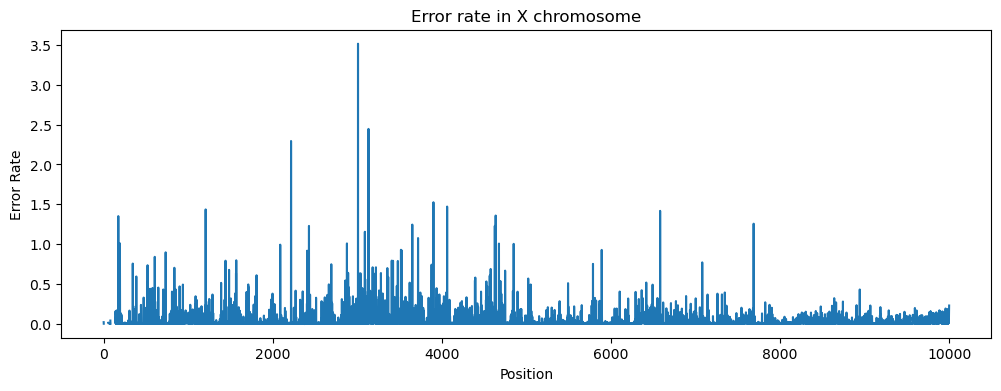

In [15]:
# plot hist_error_indices[i]/hist_read_indices[i] for i in range(1000)
hist_error_indices, _ = np.histogram(error_indices, bins=10000)
hist_read_indices, _ = np.histogram(read_indices, bins=10000)

plt.plot(hist_error_indices/hist_read_indices)
# Change size of the plot
# width = 30, height = 10
fig = plt.gcf()
fig.set_size_inches(12, 4)
plt.xlabel('Position')
plt.ylabel('Error Rate')
plt.title('Error rate in X chromosome')
plt.show()

In [11]:
h = hist_error_indices/hist_read_indices
h[np.isnan(h)] = 0
h[np.isinf(h)] = 0

/tmp/ipykernel_10873/3033115994.py:1: RuntimeWarning: divide by zero encountered in divide
  h = hist_error_indices/hist_read_indices
/tmp/ipykernel_10873/3033115994.py:1: RuntimeWarning: invalid value encountered in divide
  h = hist_error_indices/hist_read_indices


In [12]:
# Get top 10 values
top_10 = np.sort(h)[-10:]
top_10
args = np.argsort(h)[-10:]  
args

array([7687,  173, 4636, 6581, 1206, 4062, 3900, 2216, 3132, 3008])